In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def calc_areas(image):
    """
    Args:
        image (np.ndarray) : bgr image
    Return:
        areas (list of integer) : list of areas
    """
    if image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    elif image.shape[2] == 4:
        gray = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY())
    elif image.shape[2] == 1:
        gray = image
    thresh, thresh_image = cv2.threshold(gray, -1, 255, cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(
        thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    draw_contour(image, contours)
    
    areas = []
    for contour in contours:
        areas.append(cv2.contourArea(contour, oriented=False))
    return areas

In [21]:
def draw_contour(image, contours):
    cv2.drawContours(image, contours, -1, [0, 0, 255])
    plt.imshow(image[:, :, ::-1])

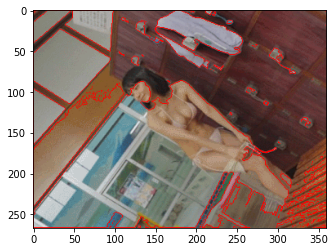

In [22]:
filename = "/home/kitamura/dataset/video/sample01/sample01_0.png"
img = cv2.imread(filename)

areas = calc_areas(img)

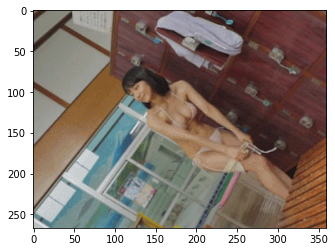

In [6]:
plt.imshow(img[:, :, ::-1])